# Complex numbers in python
### Developed for eltech processing
#### Alexander Tulupov, 10.2021

## Part 1. Introduction


In [1]:
import cmath  # For advanced features e.g. pfase, polar.
# cmath means Complex MATH

import math  # To work with square roots, pi...

In [2]:
# Basics functionality
z1 = complex(3,4)
z2 = complex(-2,5)

print('z1=', z1, '\nz2=', z2)
print('z1*z2=', z1*z2)
print('z1^2=',z1**2)

z1= (3+4j) 
z2= (-2+5j)
z1*z2= (-26+7j)
z1^2= (-7+24j)


In [3]:
# Advanced functionality (using cmath package)

z3 = complex(1,1)  # z3 = 1+i: r = sqrt(2), phase = +pi/4 - expected
w = cmath.polar(z3)  # Convert complex number to polar form
  
print ("The modulus and argument of polar complex number is :")
print(w)

print('\nsqrt(2)=', math.sqrt(2))
print('pi/4=', math.pi/4)

print('\nIt works! Wow!')

The modulus and argument of polar complex number is :
(1.4142135623730951, 0.7853981633974483)

sqrt(2)= 1.4142135623730951
pi/4= 0.7853981633974483

It works! Wow!


In [4]:
# The r and phase could be extracted by:
radius_peremennaya = w[0]  # You can name em by your way
phasa_peremennaya = w[1]  # Don't be afraid :) 

print('r is', radius_peremennaya)
print('phase is', phasa_peremennaya)

r is 1.4142135623730951
phase is 0.7853981633974483


In [5]:
# To transform polar form to the rectangular use rect(r, phi) function:
print('w =',w, '- in polar form')
z = cmath.rect(w[0],w[1])
print("The rectangular form of w is : ")
print(z)

print('Uncertainty is connected with python\'s accuracy. It\'s ok.')

w = (1.4142135623730951, 0.7853981633974483) - in polar form
The rectangular form of w is : 
(1.0000000000000002+1j)
Uncertainty is connected with python's accuracy. It's ok.


In [6]:
# Some additional examples
z1 = cmath.rect(math.sqrt(2), math.pi/2)  # Initial z1 with r and phi
w1 = cmath.polar(z1)  # Convert z1 to a polar form
print(w1)

z2 = cmath.rect(math.sqrt(8), 3*math.pi/2) # Initial z2 with r and phi
w2 = cmath.polar(z2)  # Convert z2 to a polar form
print(w2)  # !Note that +3pi/2 is the same as a -pi/2

z3 = z1*z2
print('\n Re(z3)=', z3.real )
print('Im(z3)=',    z3.imag )

# Or in the polar form:
r3 = cmath.polar(z1*z2)[0]
phase3 = cmath.polar(z1*z2)[1]
print('w3 = (',r3, ',', phase3,')')

# To exclude a "trash of accuracy" out from the results one can use a round() function:
print('\nRe(z3)=', round(z3.real,5)  )
print('Im(z3)=',   round(z3.imag,5)  )

# The same for polar one:
print('w3 = (', round(r3, 5) , ',', round(phase3, 5),')')

(1.4142135623730951, 1.5707963267948966)
(2.8284271247461903, -1.5707963267948968)

 Re(z3)= 4.000000000000001
Im(z3)= -9.797174393178828e-16
w3 = ( 4.000000000000001 , -2.4492935982947064e-16 )

Re(z3)= 4.0
Im(z3)= -0.0
w3 = ( 4.0 , -0.0 )


### Using this package u can produce the eltech BDZ without any problem!
#### Good luck!


# Part 2 Draw

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np

# Define the |z| as a sqrt(zz*):
cabs = lambda z: math.sqrt( (z*z.conjugate()).real )  # cabs = Complex ABS

# Round for Complex number:
def _cround(z, accuracy):
    if type(z) == complex or type(z) == np.complex128:    
        return complex(round(z.real, accuracy), round(z.imag, accuracy))
    else:
        print(type(z))


# Round for array of complex numbers:
def cround(z_array, accuracy):
    assert len(z_array) > 1
    output_arr = []
    
    for z in z_array:
        output_arr.append(_cround(z, accuracy))
    return output_arr


# Ccompare = Complex compare
def Ccompare(z1,z2):
    if cabs(z1 - z2) < 0.001:
        return True
    else: 
        return False


# Creates colorization for an input array
def _colorize(arr):# e.g. [1,3,2,5,4] -> 5 colors
    norm = mpl.colors.Normalize(vmin=np.min(arr), vmax=np.max(arr))
    cmap = cm.Accent
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(arr)

# Draws an array of complex numbers
def drawz(z_array,  # Array with complex numbers you want to draw 
          names=[],  # Array with names of the variables 
          leg_on=True,  # Turns off the legend
          scale=1,  # Scales the canvas if it's too small
          no_arrows=False  # Turns off the arrows 
         ):

    # Check the input data
    if type(z_array) != list:
        z_array = list(z_array)
    
    for z in z_array:
        if type(z) != complex:
            z = complex(z)
        
#     if len(names) > 0:
#         assert len(names) == len(z_array)

    # Adjust the canvas
    z_reals = [z.real for z in z_array]
    z_imags = [z.imag for z in z_array]
    
    # To avoid small canvases
    z_reals += [-1,0,1]
    z_imags += [-1,0,1]
    
    xmin = min(z_reals);  xmax = max(z_reals)
    ymin = min(z_imags);  ymax = max(z_imags)
    
    xmin = xmin*1.02-0.05;  xmax = xmax*1.02+0.05
    ymin = ymin*1.02-0.05;  ymax = ymax*1.02+0.05
    
    Lx = xmax - xmin
    Ly = ymax - ymin

    fig = plt.figure(figsize=(Lx*scale, Ly*scale))
    canv_size = min((Lx*scale, Ly*scale))
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    # Plot
    clrs = _colorize( [i for i in range(len(z_array))] )
    lw = canv_size/2  # Line width
    alph = 1.0  # transparency
    accuracy = 3
    
    for i,z in enumerate(z_array):
        clr = clrs[i]
        _strp = 0.02*cabs(z)
        
        # Select a name from the list
        name = ''
        if len(names) > i:
            name = names[i]+' = '
        
        # Draw a line
        plt.plot([0, z.real*0.99], [0, z.imag*0.99], 
                 lw=lw, c=clr, alpha=alph,
                 label = name+str(_cround(z, accuracy)))
        
        # Draw an arrow
        if not no_arrows:
            zn = complex(z.imag/cabs(z),  # normal vector to z
                         -z.real/cabs(z))
            w_p = z*0.95+zn*_strp  # Right-side point (rsp)
            w_m = z*0.95-zn*_strp  # Left-side point (lsp)
            
            # Plot the line across rsp, z, lsp - it's an arrow!
            plt.plot([w_p.real, z.real, w_m.real], 
                     [w_p.imag, z.imag, w_m.imag], 
                     lw=lw, c=clr, alpha=alph)
    
    # Setting up the axis
    plt.ylabel('Imaginary',fontsize=15)
    plt.xlabel('Real',fontsize=15)
    
    # Draw a legend & grid
    if leg_on: plt.legend(fontsize=10)
    plt.grid()

    return fig

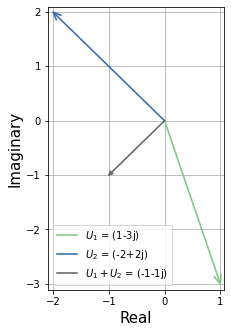

In [8]:
z1 = 1-3j
z2 = -2+2j
z3 = z1+z2
# z_array = [z1+i for i in np.linspace(1,2,4)]
z_array = [z1,z2,z3]
names = [r'$U_1$',r'$U_2$',r'$U_1+U_2$']
fig = drawz(z_array, names=names, leg_on=True, scale=1, no_arrows=False)
fig.savefig('Complex_draw.pdf')

# Part 3. Linear equation systems

In [9]:
import numpy as np

In [10]:
# Example with float numbers
# 1x + 2y = 0
# 3x + 5y = 4
# x = 8, y = -4 are expected

a = np.array([[1, 2], [3, 5]])
b = np.array([0, 4])

x = np.linalg.solve(a, b)
x

array([ 8., -4.])

The solution is approximately: [(1.303-0.134j), (0.018+0.08j)]


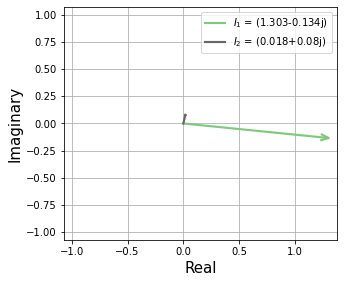

In [11]:
# Let's try the same with complex numbers
a = np.array([[1j+7, 2j-5], [3j, 5j]])
b = np.array([9, 4j])
x = np.linalg.solve(a, b)
x = cround(x, 3)
print('The solution is approximately:',x)
fig = drawz(x, [r'$I_{1}$',r'$I_{2}$'], scale=2)
plt.show()

# Part 4. Practice

In [38]:
# Сопротивления в общем
z1 = 2 - 1j
z2 = 1 + 0.5j
z3 = 1 - 1j
z4 = 1.5 + 1j
z5 = 1
zn = 1

# Сопротивления варианта
z12 = z2
z13 = z1
z23 = z4
z14 = z5

# Делает проводимость из сопротивления
y = lambda z: 1/z

# Проводимости
y13 = y(z13)
y12 = y(z12)
y14 = y(z14)
yn =  y(zn)

# Действующие токи и напряжения
E = cmath.rect(10/np.sqrt(2), math.pi/6)
I = cmath.rect(1/np.sqrt(2), math.pi/2)

## Задание 1. Правила Кирхгофа

The solution is approximately: [(3.7374+0.9748j), (-0.8636-0.2828j), (2.8738+0.692j), (0.8636+0.9899j)]


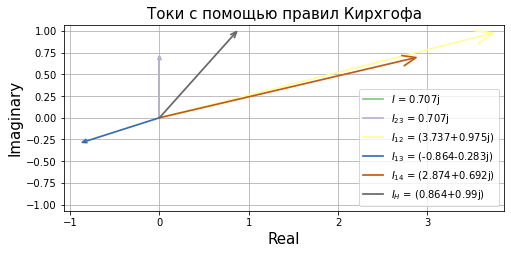

In [80]:
# Порядок внесения в систему: I12, I13, I14, In

# Матрица системы
A = np.array([[1, 1, -1, 0], 
              [0, -1, 0, -1],
              [z12, 0, z14, 0],
              [0, z13, z14, -zn]])

# Вектор неоднородности
b = np.array([0, -I, E, 0])

# Решение
x1 = np.linalg.solve(A, b)

# Округление решения
x1 = cround(x1, 4)
print('The solution is approximately:',x1)

# Рисуем с током I и I23
I23 = I  # Очевидно из схемы
x1_to_draw = [I, I23, *x1]
fig = drawz(x1_to_draw, 
            [r'$I$', r'$I_{23}$', r'$I_{12}$',r'$I_{13}$',r'$I_{14}$',r'$I_{H}$'],
            scale=1.6)
plt.title('Токи с помощью правил Кирхгофа', fontsize=15)

# Сохраняем файл
fig.savefig('Task1.pdf')

# Результат
I12 = x1[0]
I13 = x1[1]
I14 = x1[2]
In = x1[3]

### Проверка выкладок

In [44]:
# Проверка выкладок

# Узел 1
assert Ccompare(I12 + I13 - I14, 0)

# Узел 3
assert Ccompare(I - I13 - In, 0)

# Контур 1
assert Ccompare(I12*z12 + I14*z14, E)

# Контур 2
assert Ccompare(I13*z13 + I14*z14 - In*zn, 0)

print('Все хорошо, тесты пройдены')

Все хорошо, тесты пройдены


### Расчет напряжений

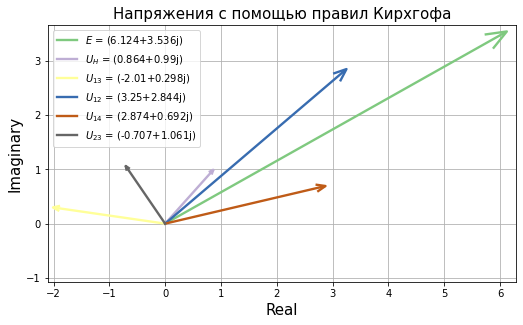

In [77]:
un = In*zn
u13 = I13*z13
u12 = I12*z12
u14 = I14*z14
u23 = I23*z23
xU = [E, un, u13, u12, u14, u23]

fig = drawz(xU, 
            [r'$E$', r'$U_{H}$',r'$U_{13}$',r'$U_{12}$',r'$U_{14}$',r'$U_{23}$'],
            scale=1)
plt.title('Напряжения с помощью правил Кирхгофа', fontsize=15)
fig.savefig('Task1_U.pdf')

## Задание 2. Метод Контурных Токов (МКТ)

The solution is approximately: [(3.7374+1.6819j), (-0.8636-0.9899j)]


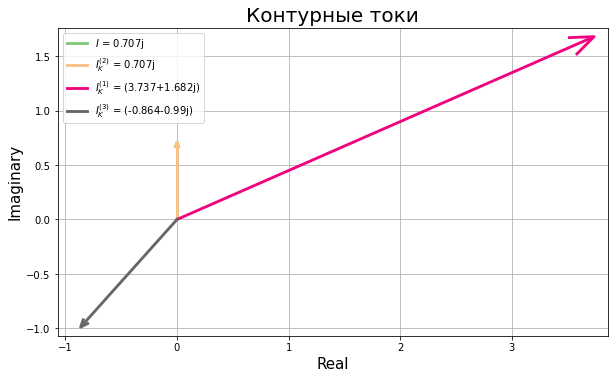

In [76]:
# Порядок внесения в систему: Ik1, Ik3

# Матрица системы
A = np.array([[z12+z14, z14],
              [z14    ,z13+z14+zn]])

# Вектор неоднородности
b = np.array([E+I*z12, -I*z13])

# Решение
x2 = np.linalg.solve(A, b)

# Округление решения
x2 = cround(x2, 4)
print('The solution is approximately:',x2)

# Рисуем с током I и Ik1
Ik2 = I  # Было очевидно из уравнения
x2_to_draw = [I, Ik2, *x2]
fig = drawz(x2_to_draw, 
            [r'$I$',r'$I^{(2)}_{K}$', r'$I^{(1)}_{K}$',r'$I^{(3)}_{K}$'],
            scale=2)
plt.title('Контурные токи', fontsize=20)

# Сохраняем файл
fig.savefig('Task2.pdf')

# Результат (Ik2 = I было написано выше)
Ik1 = x2[0]
Ik3 = x2[1]

### Тест на совпадение токов в заданиях 1 и 2

In [47]:
# Сравнение токов с заданием 1
assert Ccompare(I12, Ik1 - I)
assert Ccompare(I14,Ik3+Ik1)
assert Ccompare(In,-Ik3)

print('Все топово')

Все топово


## Метод Узловых Потенциалов (МУП)

The solution is approximately: [(2.8738+0.692j), (0.8636+0.9899j)]


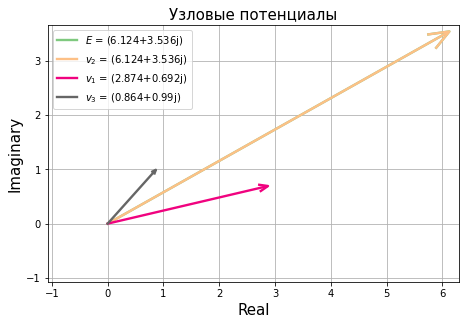

In [73]:
# Порядок внесения в систему: v1, v3

# Матрица системы
A = np.array([[y13               , -y13-yn],
              [-y12-y13-y14,       y13    ]])

# Вектор неоднородности
b = np.array([-I, -y12*E])

# Решение
x3 = np.linalg.solve(A, b)

# Округление решения
x3 = cround(x3, 4)
print('The solution is approximately:',x3)

# Рисуем с напряжением E и u2
v2 = E  # Было очевидно из схемы
x3_to_draw = [E, v2, *x3]
fig = drawz(x3_to_draw, 
            [r'$E$',r'$v_{2}$',r'$v_{1}$',r'$v_{3}$'],
            scale=1)
plt.title('Узловые потенциалы', fontsize=15)

# Сохраняем файл
fig.savefig('Task3.pdf')

# Результат (v2 = E было написано выше)
v1 = x3[0]
v3 = x3[1]
v4 = 0  # Земля

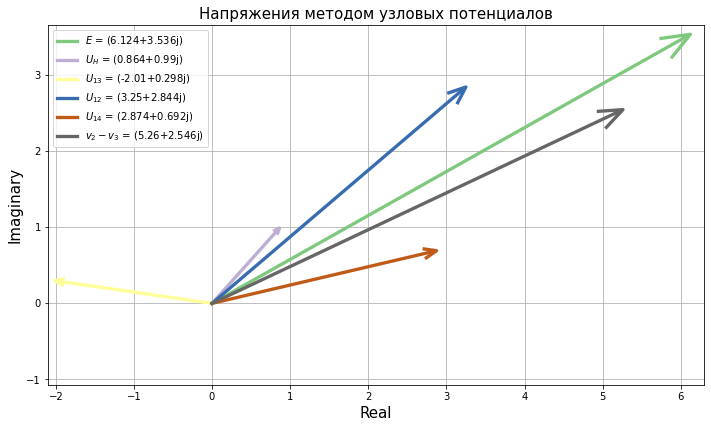

In [72]:
# Подсчет напряжений
un_3 = v3-v4
u14_3 = v1-v4
u24_3 = v2-v4
u13_3 = v3-v1
u12_3 = v2-v1
u23_3 = v2-v3
xU = [E, un_3, u13_3, u12_3, u14_3, u23_3]

fig = drawz(xU, 
            [r'$E$', r'$U_{H}$',r'$U_{13}$',r'$U_{12}$',r'$U_{14}$',r'$v_2-v_3$'],
            scale=1.4)
plt.title('Напряжения методом узловых потенциалов', fontsize=15)
fig.savefig('Task3_U.pdf')

### Тест на совпадение токов с заданием 1

In [54]:
# Проверка уравнений и выкладок

# 2 Узел
assert Ccompare(v2, E)

# 3 Узел
assert Ccompare(I-I13-In, 0)
assert Ccompare(I-y13*(v3-v1)-yn*v3, 0)

# 1 Узел
assert Ccompare(I12+I13-I14,0)
assert Ccompare(y12*(v2-v1)+y13*(v3-v1)-y14*v1, 0)
assert Ccompare(y12*(E-v1)+y13*(v3-v1)-y14*v1, 0)

# Система
assert Ccompare(v1*y13 + v3*(-y13-yn), -I)
assert Ccompare(v1*(-y12-y13-y14) + v3*(y13), -y12*E)

# Проверка совпадения с напряжениями из первого задания
assert Ccompare(I13*z13, u13)
assert Ccompare(I12*z12, u12)
assert Ccompare(I14*z14, u14)
assert Ccompare(In*zn, un)

print('Все хорошо, тесты пройдены')

Все хорошо, тесты пройдены


## Метод Эквивалентного Генератора (МЭГ)

Ток нагрузки совпадает с первым заданием:
U_xx/(zin + zn) =  (0.8636+0.9899j)
I_n =  (0.8636+0.9899j)


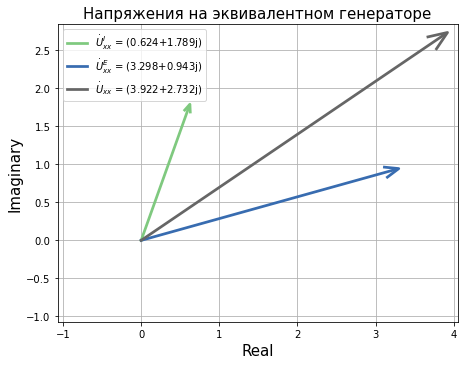

In [91]:
# z входное
par = lambda z1,z2: y(y(z1)+y(z2))
zin = z13 + par(z14,z12)
# U холостого хода
uxxE = E*z14 / (z12 + z14)
uxxI = I*(z13 + par(z14,z12)) 
uxx = uxxE + uxxI

assert Ccompare(uxx/(zin + zn) , In)
print('Ток нагрузки совпадает с первым заданием:')
print('U_xx/(zin + zn) = ',_cround(uxx/(zin + zn),4))
print('I_n = ',_cround(In,4))

fig = drawz([uxxI,uxxE,uxx], 
            [r'$\dot{U}_{xx}^{I}$',r'$\dot{U}_{xx}^{E}$',r'$\dot{U}_{xx}$'],
            scale=1.4)
plt.title('Напряжения на эквивалентном генераторе', fontsize=15)
fig.savefig('Task4.pdf')